# Introduction to Convolutional Neural Networks and Computer Vision with tensorflow

Computer vision is the practive of writting algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

In [4]:
# Get the data (Food 101 dataset only using pizza & steak classes)
# We start with a smaller dataset so we can experiment quickly and figure what works before scaling up

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

A verz crucial step at the begining of any ML project is becoming one with the data.

For CV projects, this usually means visualizing many samples of your data

In [10]:
import os

#Walk through pizza_steak directory and list numeber of file
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 1 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 1 images in pizza_steak/test/steak/.ipynb_checkpoints
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [16]:
#Get the classnames programatically
import pathlib
import numpy as np 

data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class_names from the subdirectories

print(class_names)

['pizza' 'steak']


In [26]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setupt the target directory 
    target_folder = target_dir + target_class

    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    #Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img
    

['1284978.jpg']
Image shape: (512, 512, 3)


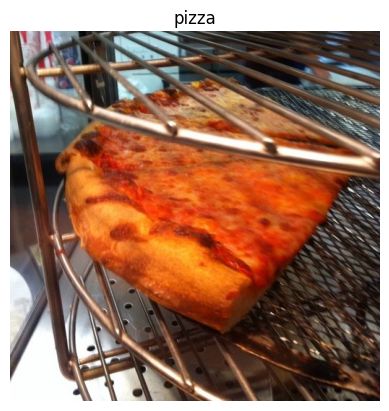

In [86]:
img = view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")

In [92]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[137,  80,  69],
        [136,  87,  72],
        [123,  82,  62],
        ...,
        [ 39,  30,  25],
        [ 39,  30,  25],
        [ 39,  30,  25]],

       [[133,  79,  67],
        [135,  86,  71],
        [122,  84,  63],
        ...,
        [ 43,  34,  29],
        [ 41,  32,  27],
        [ 41,  32,  27]],

       [[128,  76,  62],
        [133,  86,  68],
        [123,  85,  62],
        ...,
        [ 48,  38,  36],
        [ 46,  36,  34],
        [ 45,  35,  33]],

       ...,

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 18,   7,   5],
        [ 22,   8,   5],
        [ 24,  10,   7]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 18,   8,   6],
        [ 20,   9,   5],
        [ 21,  10,   6]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 23,  13,  1